# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

Работа выполнена совместно с Георгием Кривовым

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

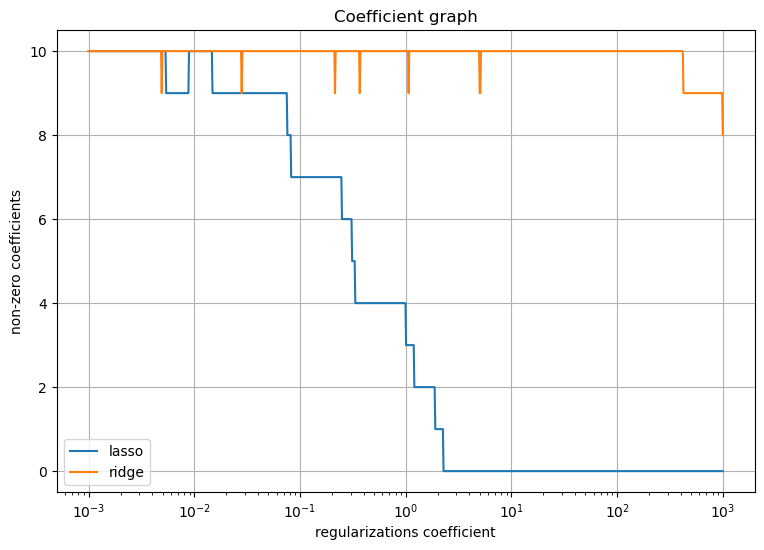

In [4]:
#коэффициенты регулизации:
alp = np.logspace(-3, 3, num = 1000, base = 10.0)

ans_lasso = []
ans_ridge = []

for coef in alp:
    reg = Lasso(alpha=coef)
    reg.fit(X_train, y_train)
    ans_lasso.append(np.sum(abs(reg.coef_) > 0.2))
    
    reg = Ridge(alpha=coef)
    reg.fit(X_train, y_train)
    ans_ridge.append(np.sum(abs(reg.coef_) > 0.2))
    
    #в целом здесь ещё ненулевыми параметрами могли быть параметры, которые например больше 0.5 (правила мат.округления) и больше 0.1 (красивое число)
    #при всех таких числах график примерно одинаковый

fig, ax = plt.subplots(figsize=(9, 6))
plt.xscale('log')
ax.set_xlabel('regularizations coefficient')
ax.set_ylabel('non-zero coefficients')
ax.set_title('Coefficient graph')
plt.plot(alp, ans_lasso, label='lasso')
plt.plot(alp, ans_ridge, label='ridge')
plt.legend()
plt.grid()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2

In [6]:
reg = Ridge()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))

MSE: 58.304295113912275
MAE: 49.602750809651916
R2: 0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

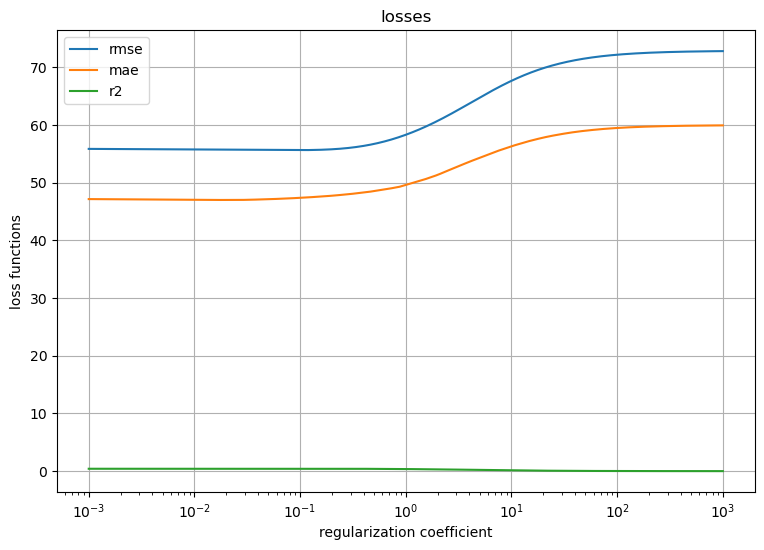

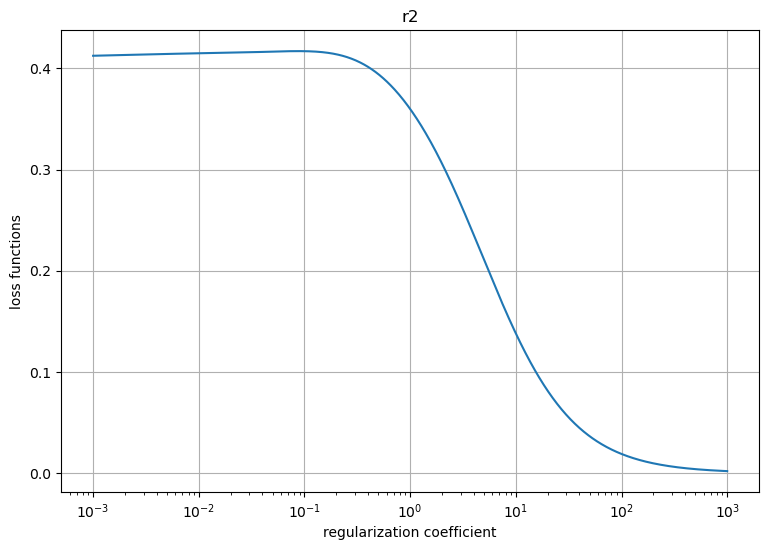

In [7]:
rmse = []
mae = []
r2 = []

for coef in alp:
    reg = Ridge(coef)
    reg.fit(X_train, y_train)
    prediction = reg.predict(X_test)
    rmse.append(sqrt(MSE(y_test, prediction)))
    mae.append(MAE(y_test, prediction))
    r2.append(R2(y_test, prediction))
    
fig, ax = plt.subplots(figsize=(9, 6))
plt.xscale('log')
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('loss functions')
ax.set_title('losses')
plt.plot(alp, rmse, label='rmse')
plt.plot(alp, mae, label='mae')
plt.plot(alp, r2, label='r2')
plt.legend()
plt.grid()

#наверное стоит сделать отдельный график, для r2
fig, ax = plt.subplots(figsize=(9, 6))
plt.xscale('log')
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('loss functions')
ax.set_title('r2')
plt.plot(alp, r2)
plt.grid()

In [8]:
reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))

#(изменилось не оч сильно)
#я кстати чтобы найти 0.1 немного на других коэффициентах позапускал

MSE: 55.641761224049134
MAE: 47.375463757061304
R2: 0.41702880920983454


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([199.,  43.,  27.,  19.,  10.,   5.,   2.,   2.,   1.,   1.]),
 array([8.85150216e-02, 2.42702189e+03, 4.85395526e+03, 7.28088863e+03,
        9.70782200e+03, 1.21347554e+04, 1.45616887e+04, 1.69886221e+04,
        1.94155555e+04, 2.18424889e+04, 2.42694222e+04]),
 <BarContainer object of 10 artists>)

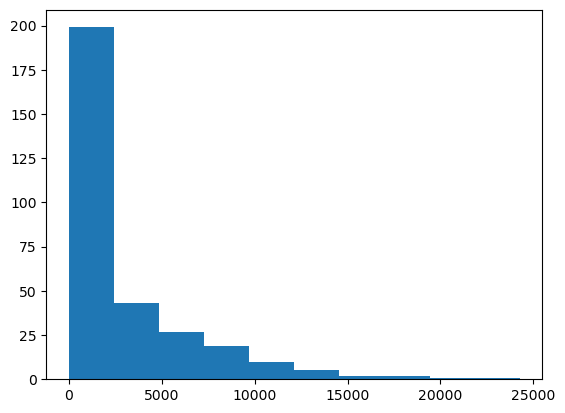

In [9]:
reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_train)
errors = np.array((y_train - prediction)**2)
plt.hist(errors)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [20]:
from scipy import stats
reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))

print("NEW")

#про удаление отколонений больших 3 прочитал в интернете.
data = load_diabetes()
data.target = data.target[(np.abs(stats.zscore(data.data.data)) < 3).all(axis=1)]
data.data = data.data[(np.abs(stats.zscore(data.data.data)) < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))

# в целом норм, но мне стало интересно, что будет, если я просто удалю элементы, ориентируясь на график

MSE: 55.28202605570776
MAE: 46.74682797739885
R2: 0.4245424935100538
NEW
MSE: 51.83289278321181
MAE: 43.22832798357395
R2: 0.4862182275029433


In [18]:
#Буду удалять после 5500 (смотря на график)
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)
reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))

print("NEW")
prediction = reg.predict(X_train)
errors = np.array((y_train - prediction)**2)
indexes = errors <= 5500
X_train, y_train = X_train[indexes], y_train[indexes]

reg = Ridge(0.1)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

rmse = sqrt(MSE(y_test, prediction))
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)

print("MSE: " + str(rmse))
print("MAE: " + str(mae))
print("R2: " + str(r2))


#вывод в том, что zscore использовать круто, а метод пристального взгляда на график - иногда не круто

MSE: 55.641761224049134
MAE: 47.375463757061304
R2: 0.41702880920983454
NEW
MSE: 55.28202605570776
MAE: 46.74682797739885
R2: 0.4245424935100538


__Задание 3.__ Отчёт

**(2 балла)**

1. В этом задании я научился работать c MSE, MAE, R2. 
2. Научился подбирать параметры для линейной регрессии.
3. Так же я научился опеределять выбросы двумя способами: с помощью взгляда на график и с помощью Z-оценки.